In [2]:
# Name: Jumana Haseen (2021627)
# Name: Chong Jun Hui (2021094), 
# Name: Class: Tushita Govindaraj (2012155)
# Date of Submission: 11/2/2022
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error,make_scorer, f1_score
from sklearn.metrics import *
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import roc_auc_score

mpl.rcParams['agg.path.chunksize'] = 10000


# **Visualization using PCA**

In [34]:
df=pd.read_csv('JustTaxi.csv', index_col=0)
df.head()

C:\Users\zhang\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,2.748779e+11,9.293,17.000000,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000,1
1,1.632088e+11,10.000,262.184418,0.599490,-9.180023,-2.520432,0.026767,-0.030687,-0.006071,556.0,2.110000,0
2,1.632088e+11,3.900,247.000000,-0.178970,9.149704,3.551163,-0.006271,-0.026047,-0.012314,32.0,9.050000,1
3,2.920578e+11,4.000,248.000000,0.270553,3.270579,8.959376,-0.009404,0.023554,-0.006946,1008.0,9.497410,1
4,2.491081e+11,6.000,95.000000,-0.152798,9.903376,-0.042253,-0.006894,0.063513,0.028047,518.0,0.048665,1


## Scaling of Data

In [4]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
data_std = scaler.fit_transform(df.drop(['label','bookingID'], axis=1))
data_std=pd.DataFrame(data_std)
data_std.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.013028,-1.360192,-0.025925,0.520861,1.212425,0.263614,0.023326,-0.102206,-0.745001,-1.089835
1,-0.001726,0.889941,0.393860,-1.690334,-1.074548,0.284991,-0.171559,-0.055576,-0.097196,-0.852938
2,-0.099239,0.750589,-0.182772,0.581566,0.838663,-0.045323,-0.145509,-0.116386,-1.232479,0.003348
3,-0.097640,0.759766,0.150205,-0.147129,2.542837,-0.076645,0.132941,-0.064093,0.882093,0.058551
4,-0.065669,-0.644362,-0.163385,0.674981,-0.293653,-0.051548,0.357265,0.276774,-0.179526,-1.107274


## PCA Statistics

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

#X = iris.data
#y = iris.target
#target_names = iris.target_names

pca = PCA(n_components=10)
pca_samples = pca.fit(data_std).transform(data_std)

# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalues']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

pca_results = pca_results(data_std, pca)
pca_results

,Eigenvalues,Explained Variance,0,1,2,3,4,5,6,7,8,9
PC 1,1.4193,0.1419,0.3007,0.1302,-0.1165,-0.6757,-0.6472,-0.0298,0.0431,0.0117,0.0285,-0.0018
PC 2,1.2758,0.1276,-0.1045,0.3155,-0.0159,0.0178,0.0317,0.0027,0.0894,0.0647,0.6203,0.7007
PC 3,1.1745,0.1175,0.0221,0.0701,0.2903,-0.0307,-0.0435,-0.1748,-0.7157,-0.5963,0.0642,0.0712
PC 4,1.0267,0.1027,0.0230,-0.1095,-0.5042,0.0293,0.0151,0.6839,0.0447,-0.5048,0.0872,0.0009
PC 5,1.0059,0.1006,0.6308,-0.5988,0.1342,0.0620,0.1051,-0.0243,-0.0141,0.0748,0.4499,-0.0429
PC 6,0.9914,0.0991,-0.0656,-0.1646,-0.7097,-0.0175,0.1103,-0.6554,-0.0305,-0.1381,0.0497,0.0188
PC 7,0.9499,0.0950,0.6468,0.6496,-0.1274,0.1468,0.3004,-0.0467,0.0342,-0.0446,-0.1008,-0.1270
PC 8,0.8055,0.0805,-0.0068,0.0361,-0.3230,0.0209,-0.0040,0.2483,-0.6868,0.5983,0.0417,-0.0306
PC 9,0.7208,0.0721,-0.2606,0.2372,0.0222,-0.0044,-0.0396,-0.0340,0.0409,-0.0232,0.6212,-0.6961
PC 10,0.6301,0.0630,0.0958,0.0375,-0.0696,0.7178,-0.6804,-0.0753,0.0196,-0.0139,-0.0037,0.0108


In [12]:

print('Total variance explained by first 5 PCs', pca_results['Explained Variance'].head(5).sum())
print(f'Total variance explained by first 8 PCs', pca_results['Explained Variance'].head(8).sum())

Total variance explained by first 5 PCs 0.5902999999999999
Total variance explained by first 8 PCs 0.8649


According to Kaiser's rule, only the first 5 PCs should be extracted since their eigenvalues are more than 1. However, the first 5 PCs explain approximately only 59% of the total variance. Atleast the first 8 PCs should be extracted in order to be able to explain approximately 86% of the total variance.

## Scree Plot

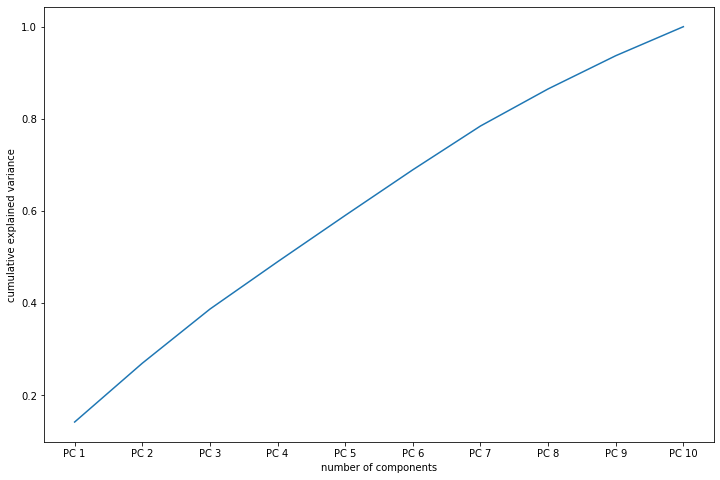

In [13]:
df3 = pd.DataFrame(pca_results)
eigvals = pd.DataFrame(df3['Explained Variance'])

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_results['Explained Variance']))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

No elbow can be observed from scree plot. Hence, extracting the highest possible number of PCs would be the most appropriate way to reduce dimension of dataset. Thus, the first 8 PCs will be extracted.

 ## Visualization and Exploratory of Data

In [14]:
data_std['label'] = df['label']
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(data_std.shape[0]):
    # Extract the label for comparison
    if data_std['label'][i] == 0:
        # Save meaningful label to the results
        results.append('Safe')
    # Following the same code pattern as the one above
    elif data_std['label'][i] == 1:
        results.append('Dangerous')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results        
data_std['features'] = results

data_std['First Principal Component'] = pca_samples[:,0]
data_std['Second Principal Component'] = pca_samples[:,1] 
data_std.head()

,0,1,2,3,4,5,6,7,8,9,label,features,First Principal Component,Second Principal Component
0,-0.013028,-1.360192,-0.025925,0.520861,1.212425,0.263614,0.023326,-0.102206,-0.745001,-1.089835,1,Dangerous,-1.341971,-1.609304
1,-0.001726,0.889941,0.393860,-1.690334,-1.074548,0.284991,-0.171559,-0.055576,-0.097196,-0.852938,0,Safe,1.889212,-0.465492
2,-0.099239,0.750589,-0.182772,0.581566,0.838663,-0.045323,-0.145509,-0.116386,-1.232479,0.003348,1,Dangerous,-0.887956,-0.495905
3,-0.097640,0.759766,0.150205,-0.147129,2.542837,-0.076645,0.132941,-0.064093,0.882093,0.058551,1,Dangerous,-1.461849,0.921153
4,-0.065669,-0.644362,-0.163385,0.674981,-0.293653,-0.051548,0.357265,0.276774,-0.179526,-1.107274,1,Dangerous,-0.333625,-1.028653


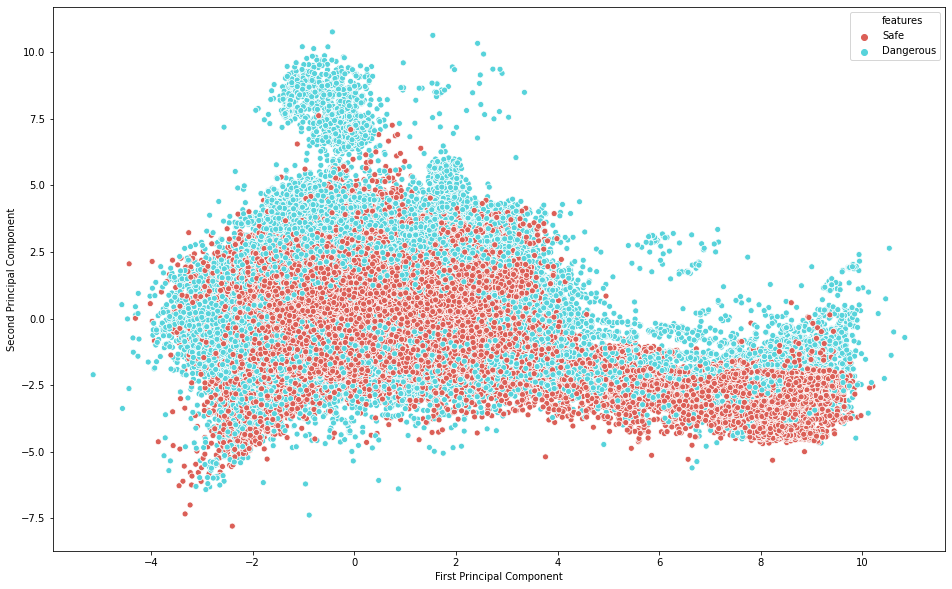

In [15]:
# Visualize the separation of the classes
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="First Principal Component", y="Second Principal Component",
    hue = "features",
    hue_order = ['Safe', 'Dangerous'],
    palette=sns.color_palette("hls", 2),
    data=data_std,
    legend="full")

The above chart shows that both classes, safe and dangerous trips are overlapping and clustered over each other. This makes it difficult for them to be distictively classified into two separate groups. 

One reason for this could be because there are too many records with only a few features. However, if the dimension of the dataset is reduced, it may not be very accurate since the we have only 10 dimension in this dataset. Hence, all the features are taken as of equal importance to predict whether a trip is safe or dangerous.

# **Outlier Detection and Removal**

## Baseline Model AUC

C:\Users\zhang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC and AUC:0.5429640568944126


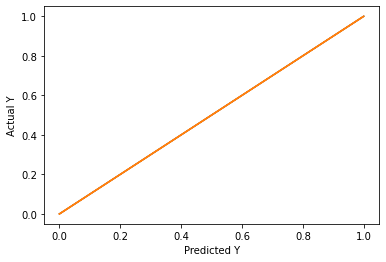

In [35]:
df_nobookingID = df.drop(columns=['bookingID'])
# retrieve the array
data_2 = df_nobookingID.values
# split into input and output elements
X, y = data_2[:, :-1], data_2[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
print(f'ROC and AUC:{roc_auc_score(y_test, yhat)}')

%matplotlib inline
plt.plot(y_test, y_test) # baseline
plt.plot(yhat, yhat)  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y') 
plt.show()

## Remove Outliers

In [31]:
# retrieve the array
data = df_nobookingID.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
print(f'ROC and AUC:{roc_auc_score(y_test, yhat)}')

(4820089, 10) (4820089,)
(4338080, 10) (4338080,)
ROC and AUC:0.6467336686139713


In [52]:
Xtrain = pd.DataFrame(X_train, columns = ['Accuracy','Bearing','Acceleration X', 'Acceleration Y', 'Acceleration Z', 'Gyro X', 'Gyro Y', 'Gyro Z', 'Seconds', 'Speed'])
Xtest = pd.DataFrame(X_test, columns=['Accuracy','Bearing','Acceleration X', 'Acceleration Y', 'Acceleration Z', 'Gyro X', 'Gyro Y', 'Gyro Z', 'Seconds', 'Speed'])

In [53]:
Ytest = pd.DataFrame(yhat, columns=['Label'])
YTrain = pd.DataFrame(y_train, columns=['Label'])

In [54]:
train = pd.concat([Xtrain, YTrain], axis=1)
test = pd.concat([Xtest, Ytest], axis=1)

In [85]:
df_removed_outliers = pd.concat([train, test], axis=0)

# Combatting Inbalanced Class

## Pie Chart

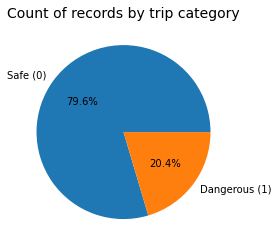

In [90]:
plt.title("Count of records by trip category", fontsize=14);
data = df_removed_outliers.groupby("Label")["Label"].count()
labels=['Safe (0)' , 'Dangerous (1)']
plt.pie(x=data, autopct="%.1f%%", labels=labels)
plt.show()

In [144]:
df_removed_outliers.groupby("Label")["Label"].count()

Label
0.0    5342606
1.0    1369549
Name: Label, dtype: int64

There is an imbalance of classes. The number of records for safe trips is 79.6% of the whole dataset and the number of records for dangerous trips is 20.4% of the whole dataset. The class imbalance ratio is almost 4:1. This would be counted as a slight imbalance. Since this is a slight imbalance problem, we will be implementing Random Over-Sampling. Before we implement Random Over-Sampling, I will be doing a normal baseline classification to see the difference before and after implementing Random Over-Sampling.


## Normal Classification With Imbalanced Class

In [91]:
# split into X and Y sets
X = df_removed_outliers.drop(['Label'], axis=1)
y = df_removed_outliers['Label']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Safe (0) ', 'Dangerous (1)']))

C:\Users\zhang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

    Safe (0)        0.81      1.00      0.89   1336547
Dangerous (1)       0.83      0.09      0.16    341492

     accuracy                           0.81   1678039
    macro avg       0.82      0.54      0.53   1678039
 weighted avg       0.81      0.81      0.74   1678039



Accuracy is high at 81%, but recall of minority class is only 9%. That means the model performs poorly in term of extracting the minority samples out of the abundant samples.

## Implementing Random Under Sampling, Random Over Sampling, SMOTE
We will try these methods to combat imbalanced classes. After fitting these methods to the dataset, we will train the new dataset generated by each method and use Logistic Regression to classify the dataset. To evaluate the performance between the methods, we will create a classification report and compare the metrics. 

In [92]:
# Implementing Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape , y_res.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Safe (0) ', 'Dangerous (1)']))

(2739098, 10) (2739098,)


C:\Users\zhang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

    Safe (0)        0.58      0.67      0.62    342692
Dangerous (1)       0.61      0.52      0.56    342083

     accuracy                           0.59    684775
    macro avg       0.60      0.59      0.59    684775
 weighted avg       0.60      0.59      0.59    684775



The accuracy has decreased to 58% for classifying safe trips and the accuracy has decresed to 61% for classifying dangerous trips. The recall of majority class has decreased to 67% but the recall of majority class increased to 52%. The F1 score for safe trips has decreased to 62% and the F1 score for dangerous trips has increased to 56%. Overall, Random Under-Sampling does not perform well because it only improves the classification for dangrous trips but 

In [93]:
# Implementing Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print(X_ros.shape , y_ros.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size=0.75, random_state=102)
# define model
knnclassifier_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Safe (0) ', 'Dangerous (1)']))

(10685212, 10) (10685212,)


C:\Users\zhang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

    Safe (0)        0.58      0.67      0.62   1336394
Dangerous (1)       0.61      0.52      0.56   1334909

     accuracy                           0.60   2671303
    macro avg       0.60      0.59      0.59   2671303
 weighted avg       0.60      0.60      0.59   2671303



The scores for precision, recall and f1 is the same as Random Under-Sampling. Thus the 2 methods have the same performance.

In [94]:
# Implementing SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.58      0.67      0.62   1336394
     class 1       0.61      0.52      0.56   1334909

    accuracy                           0.59   2671303
   macro avg       0.60      0.59      0.59   2671303
weighted avg       0.60      0.59      0.59   2671303



The scores for precision, recall and f1 is the same as Random Under-Sampling and Random Over-Sampling. Thus the 3 methods have the same performance.

However, if we compare the difference in the size of the dataset, using Random Under-Sampling has greatly reduced the size of the dataset, from 6712155 to 2739098. This is not good as there will not be enough records to do testing and training. For Random Over-Sampling and SMOTE, the number of records have been increased to 10685212. However,  increases the likelihood of overfitting since it simply replicates the minority class. Thus, I will be combining Random Under-Sampling with Random Over-Sampling or SMOTE.

In [174]:
# Implementing Random Under-Sampling and Random Over-Sampling
rus = RandomUnderSampler(random_state=42,sampling_strategy=0.3)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape , y_res.shape)
ros = RandomOverSampler(random_state=42,sampling_strategy=0.6)
X_ros, y_ros = ros.fit_resample(X_res, y_res)
print(X_ros.shape , y_ros.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Safe (0) ', 'Dangerous (1)']))

(5934712, 10) (5934712,)
(7304260, 10) (7304260,)


C:\Users\zhang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


               precision    recall  f1-score   support

    Safe (0)        0.67      0.90      0.77   1141638
Dangerous (1)       0.63      0.27      0.38    684427

     accuracy                           0.67   1826065
    macro avg       0.65      0.59      0.58   1826065
 weighted avg       0.66      0.67      0.63   1826065



By combining Random Under-Sampling and Random Over-Sampling, there are 7304260 records in total. Not a lot of records in the majority class was removed to match the same number of records in minority class and there are not as much of duplicate records in the minority class. This method reduces overfitting and also keeps the number of records the same as the beginnning. The f1 scores for majority and minority class have increased as compared

In [175]:
# Implementing Random Under-Sampling and SMOTE
rus = RandomUnderSampler(random_state=42,sampling_strategy=0.3)
X_res, y_res = rus.fit_resample(X, y)
print(X_res.shape , y_res.shape)
smote = SMOTE(random_state=42,sampling_strategy=0.6)
X_smote, y_smote = smote.fit_resample(X_res, y_res)
print(X_smote.shape , y_smote.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Safe (0) ', 'Dangerous (1)']))

(5934712, 10) (5934712,)
(7304260, 10) (7304260,)
               precision    recall  f1-score   support

    Safe (0)        0.67      0.90      0.77   1141638
Dangerous (1)       0.62      0.27      0.38    684427

     accuracy                           0.67   1826065
    macro avg       0.65      0.59      0.58   1826065
 weighted avg       0.66      0.67      0.63   1826065



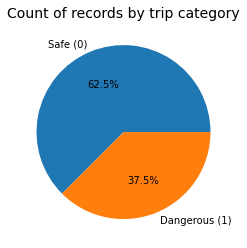

In [176]:
plt.title("Count of records by trip category", fontsize=14);
ddd = [y_ros.value_counts()[0],y_ros.value_counts()[1]]
labels=['Safe (0)' , 'Dangerous (1)']
plt.pie(x=ddd, autopct="%.1f%%", labels=labels)
plt.show()

By combining Random Under-Sampling and Random Over-Sampling, there are 7260964 records in total. It first removes 777443 records from the majority class and adds 1369548 duplicates records form the minority class.
Not a lot of records in the majority class was removed to match the same number of records in minority class and there are not as much of duplicate records in the minority class. The ratio of the classes have now changed to 2:3. This method reduces overfitting and also keeps the number of records the same as the beginnning. 

Comparing the score of the 2 different implementations, the scores are almost identical. Using Random Under-Sampling and Random Over-Sampling has a precision score of 67% and 63% for the majority and minority class respectively which is abit higher using Random Under-Sampling and SMOTE. Thus, we will use the dataset generated by Random Under-Sampling and Random Over-Sampling .

In [177]:
new_Xdf = pd.DataFrame(X_ros,columns=['Accuracy','Bearing','Acceleration X','Acceleration Y','Acceleration Z','Gyro X','Gyro Y','Gyro Z','Seconds','Speed'])
print(new_Xdf.shape)
new_Xdf.head()

(7304260, 10)


,Accuracy,Bearing,Acceleration X,Acceleration Y,Acceleration Z,Gyro X,Gyro Y,Gyro Z,Seconds,Speed
0,6.068,233.000000,0.634399,8.682587,2.776199,-0.025482,-0.038956,0.018356,484.0,8.060000
1,4.000,76.000000,3.351985,10.599455,1.980065,-0.332885,0.076142,-0.048100,1069.0,13.531090
2,3.900,187.000000,-0.399844,9.512454,0.019154,0.013653,0.034045,0.097902,434.0,16.184683
3,3.900,264.000000,1.883964,9.745227,3.268187,0.044234,0.300675,-0.092347,131.0,4.080000
4,10.000,300.055237,-0.019141,-8.943158,-3.759937,0.023287,0.068236,0.001675,1366.0,2.510000


In [178]:
new_Xdf.describe()

,Accuracy,Bearing,Acceleration X,Acceleration Y,Acceleration Z,Gyro X,Gyro Y,Gyro Z,Seconds,Speed
count,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06
mean,8.434016e+00,1.644907e+02,7.252913e-02,4.955217e+00,1.010939e+00,-1.988567e-03,-1.905950e-04,1.714163e-04,6.317835e+02,8.708216e+00
std,5.029621e+01,1.083202e+02,1.206305e+00,7.833600e+00,2.978135e+00,8.023256e-02,1.272765e-01,7.033935e-02,4.869121e+02,7.931480e+00
min,7.500000e-01,0.000000e+00,-9.999999e+00,-1.973802e+01,-1.498860e+01,-9.996722e-01,-5.984530e+00,-6.919204e+00,0.000000e+00,-1.547627e+01
25%,3.900000e+00,7.300000e+01,-4.771731e-01,5.018400e+00,-7.757450e-01,-2.442932e-02,-2.687807e-02,-1.681519e-02,2.550000e+02,8.400000e-01
50%,4.000000e+00,1.634609e+02,6.593323e-02,9.171539e+00,8.622894e-01,-6.283185e-04,2.174680e-04,0.000000e+00,5.430000e+02,7.171625e+00
75%,8.000000e+00,2.590000e+02,6.149964e-01,9.727939e+00,2.782147e+00,2.082825e-02,2.816333e-02,1.674870e-02,9.010000e+02,1.500497e+01
max,1.500000e+03,3.599985e+02,1.240322e+01,2.493920e+01,1.498577e+01,1.311228e+00,5.977267e+00,6.605837e+00,8.234000e+03,9.244882e+01


In [179]:
new_Ydf = pd.DataFrame(y_ros,columns=['Label'])
print(new_Ydf.shape)
new_Ydf.head()

(7304260, 1)


,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [180]:
new_Ydf.describe()

,Label
count,7.304260e+06
mean,3.749999e-01
std,4.841229e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [181]:
new_df = pd.concat([new_Xdf, new_Ydf], axis=1)
print(new_df.shape)
new_df.head()

(7304260, 11)


,Accuracy,Bearing,Acceleration X,Acceleration Y,Acceleration Z,Gyro X,Gyro Y,Gyro Z,Seconds,Speed,Label
0,6.068,233.000000,0.634399,8.682587,2.776199,-0.025482,-0.038956,0.018356,484.0,8.060000,0.0
1,4.000,76.000000,3.351985,10.599455,1.980065,-0.332885,0.076142,-0.048100,1069.0,13.531090,0.0
2,3.900,187.000000,-0.399844,9.512454,0.019154,0.013653,0.034045,0.097902,434.0,16.184683,0.0
3,3.900,264.000000,1.883964,9.745227,3.268187,0.044234,0.300675,-0.092347,131.0,4.080000,0.0
4,10.000,300.055237,-0.019141,-8.943158,-3.759937,0.023287,0.068236,0.001675,1366.0,2.510000,0.0


In [182]:
new_df.describe()

,Accuracy,Bearing,Acceleration X,Acceleration Y,Acceleration Z,Gyro X,Gyro Y,Gyro Z,Seconds,Speed,Label
count,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06,7.304260e+06
mean,8.434016e+00,1.644907e+02,7.252913e-02,4.955217e+00,1.010939e+00,-1.988567e-03,-1.905950e-04,1.714163e-04,6.317835e+02,8.708216e+00,3.749999e-01
std,5.029621e+01,1.083202e+02,1.206305e+00,7.833600e+00,2.978135e+00,8.023256e-02,1.272765e-01,7.033935e-02,4.869121e+02,7.931480e+00,4.841229e-01
min,7.500000e-01,0.000000e+00,-9.999999e+00,-1.973802e+01,-1.498860e+01,-9.996722e-01,-5.984530e+00,-6.919204e+00,0.000000e+00,-1.547627e+01,0.000000e+00
25%,3.900000e+00,7.300000e+01,-4.771731e-01,5.018400e+00,-7.757450e-01,-2.442932e-02,-2.687807e-02,-1.681519e-02,2.550000e+02,8.400000e-01,0.000000e+00
50%,4.000000e+00,1.634609e+02,6.593323e-02,9.171539e+00,8.622894e-01,-6.283185e-04,2.174680e-04,0.000000e+00,5.430000e+02,7.171625e+00,0.000000e+00
75%,8.000000e+00,2.590000e+02,6.149964e-01,9.727939e+00,2.782147e+00,2.082825e-02,2.816333e-02,1.674870e-02,9.010000e+02,1.500497e+01,1.000000e+00
max,1.500000e+03,3.599985e+02,1.240322e+01,2.493920e+01,1.498577e+01,1.311228e+00,5.977267e+00,6.605837e+00,8.234000e+03,9.244882e+01,1.000000e+00


In [ ]:
new_df.to_csv('NewTaxi.csv',index=False)

# **Baseline Model**
We will be using KNN, Decision Tree, Gaussian Naïve Bayes, SGD, Logistic Regression as our Baseline Model. After evaluating the performance for each model, the best 2 performing model will be chosen to do hyperparameters tuning.

In [ ]:
X = new_df.drop(columns='Label')
y = new_df['Label']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 6)

## KNN

In [29]:
# run MLFlow script
with mlflow.start_run():   
    knnclassifier = KNeighborsClassifier(n_neighbors = 5)
    knnclassifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = knnclassifier.predict(X_test)

    # Getting metrics on the validation
    acc_score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')    
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro')

    # logging parameters and metrics to MLFlow
    mlflow.log_param('n_neighbors', 5)
    mlflow.log_metric('accuracy', acc_score)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('f1', f1)

    # logging model to MLFlow
    mlflow.sklearn.log_model(knnclassifier, 'KNeighborsClassifier model')
    
target_names = ['Safe', 'Dangerous']
print(classification_report(y_test, y_pred, target_names=target_names))
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy score is ', acc_score)

              precision    recall  f1-score   support
        Safe       0.66      0.65      0.65   2140908
   Dangerous       0.63      0.69      0.66   2139672

    accuracy                           0.65   4280580
   macro avg       0.64      0.67      0.65   4280580
weighted avg       0.65      0.68      0.67   2921704

[[904613  512436]
 [ 575388  929317]]
Accuracy score is 0.653897547621395


After tuning, the best parameters are using auto as the algorithm, having 1 leaf, number of jobs is -1, 8 n_neighbours and having distance weights. Precision, recall, f1 scores have all increased as compared to the baseline model and the final accuracy is 78%. 

The accuracy score of the KNN approximately 0.65, which is relatively an average score for a baseline model. The model has average probability of predicting both safe and dangerous classes with precision score of 0.66 and 0.63 respectively. By further tuning it, we will be able to achieve a well-trained and precise model.

## Decision tree

In [30]:
# run MLFlow script
with mlflow.start_run():   
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = decision_tree.predict(X_test)

    # Getting metrics on the validation
    acc_score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')    
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro')

    # logging parameters and metrics to MLFlow
    mlflow.log_metric('accuracy', acc_score)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('f1', f1)

    # logging model to MLFlow
    mlflow.sklearn.log_model(decision_tree, 'Decision Tree model')
    
target_names = ['Safe', 'Dangerous']
print(classification_report(y_test, y_pred, target_names=target_names))
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy score is ', acc_score)

              precision    recall  f1-score   support
        Safe       0.75      0.71      0.73   2140908
   Dangerous       0.79      0.82      0.81    2139672

    accuracy                           0.76   4280580
   macro avg       0.77      0.76      0.76   4280580
weighted avg       0.77      0.56      0.76   4280580

[[1527418  401480]
 [ 132645  860161]]

Accuracy score is 0.763456342532456


The accuracy score of the decision tree model approximately 0.76, which is relatively a good score for a baseline model. The model has high probability of predicting both safe and dangerous classes with precision score of 0.75 and 0.79 respectively. By further tuning it, we will be able to achieve a well-trained and precise model.

## Gaussian Naïve Bayes

In [ ]:
# define model hyperparameter
var_smoothing = 0.00001

# run MLFlow script
with mlflow.start_run():   
    nb = GaussianNB(var_smoothing=var_smoothing)

    nb.fit(X_train, y_train)  # fit data

    y_pred = nb.predict(X_test)  # run prediction

    # Getting metrics on the validation
    acc_score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')    
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro')

    # logging parameters and metrics to MLFlow
    mlflow.log_param('var_smoothing', var_smoothing)
    mlflow.log_metric('accuracy', acc_score)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)

    # logging model to MLFlow
    mlflow.sklearn.log_model(nb, 'Naive Bayes Model')

In [26]:
#make predictions
expected = y_test
predicted_nb = nb.predict(X_test)

#summarize the fit of the model
print(metrics.classification_report(expected, predicted_nb))
print(metrics.confusion_matrix(expected, predicted_nb))
print()
print(f'Accuracy score is: {accuracy_score(expected, predicted_nb)}')

              precision    recall  f1-score   support
         0.0       0.53      0.97      0.68   2140908
         1.0       0.81      0.13      0.23   2139672

    accuracy                           0.55   4280580
   macro avg       0.67      0.55      0.46   4280580
weighted avg       0.67      0.55      0.46   4280580

[[972377  491356]
 [823411  634560]]

Accuracy score is 0.5520483205546912


The accuracy score of the Gaussian Naïve Bayes model approximately 0.522, which is relatively an average score for a baseline model. The model has relatively low probability of predicting safe but surprising very high probability of predicting dangerous classes with precision scores of 0.53 and 0.81 respectively. 

## Logistic Regresion

In [ ]:
# run MLFlow script
with mlflow.start_run():   
    lreg = LogisticRegression()
    lreg.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = lreg.predict(X_test)

    # Getting metrics on the validation
    acc_score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')    
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro')

    # logging parameters and metrics to MLFlow
    mlflow.log_metric('accuracy', acc_score)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('f1', f1)

    # logging model to MLFlow
    mlflow.sklearn.log_model(lreg, 'Logistic Regression model')
    
target_names = ['Safe', 'Dangerous']
print(classification_report(y_test, y_pred, target_names=target_names))
print(metrics.confusion_matrix(expected, predicted_nb))
print('Accuracy score is ', acc_score)

              precision    recall  f1-score   support

        Safe       0.58      0.67      0.62   2140908
   Dangerous       0.61      0.51      0.56   2139672

    accuracy                           0.59   4280580
   macro avg       0.60      0.59      0.59   4280580
weighted avg       0.60      0.59      0.59   4280580

Accuracy score is  0.5927701386260741


The accuracy score of the logistic regression model approximately 0.592, which is relatively an average score for a baseline model. The model has relatively low probability of predicting both safe and dangerous classes with precision score of 0.58 and 0.61 respectively. 

## SGD

In [ ]:
X = scale(df.drop(columns='Label'))
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 6)

# define model hyperparameter
alpha = 0.001
epsilon = 0.001
verbose = 1

# run MLFlow script
with mlflow.start_run():   
    sgd = SGDClassifier(alpha=alpha,
                        epsilon=epsilon,
                        verbose=verbose,
                        max_iter=500)

    sgd.fit(X_train, y_train)  # fit data

    y_pred = sgd.predict(X_test)  # run prediction

    # Getting metrics on the validation
    acc_score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')    
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro')

    # logging parameters and metrics to MLFlow
    mlflow.log_param('alpha', alpha)
    mlflow.log_param('epsilon', epsilon)
    mlflow.log_metric('accuracy', acc_score)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)

    # logging model to MLFlow
    mlflow.sklearn.log_model(sgd, 'SGD Classifier Model')

-- Epoch 1
Norm: 0.87, NNZs: 10, Bias: -0.229909, T: 6420868, Avg. loss: 0.853328
Total training time: 1.84 seconds.
-- Epoch 2
Norm: 0.87, NNZs: 10, Bias: -0.210351, T: 12841736, Avg. loss: 0.850261
Total training time: 3.70 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 10, Bias: -0.204415, T: 19262604, Avg. loss: 0.850175
Total training time: 5.56 seconds.
-- Epoch 4
Norm: 0.87, NNZs: 10, Bias: -0.209792, T: 25683472, Avg. loss: 0.850141
Total training time: 7.44 seconds.
-- Epoch 5
Norm: 0.88, NNZs: 10, Bias: -0.207790, T: 32104340, Avg. loss: 0.850118
Total training time: 9.40 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 10, Bias: -0.207673, T: 38525208, Avg. loss: 0.850108
Total training time: 11.41 seconds.
-- Epoch 7
Norm: 0.87, NNZs: 10, Bias: -0.215077, T: 44946076, Avg. loss: 0.850097
Total training time: 13.43 seconds.
Convergence after 7 epochs took 13.43 seconds


In [27]:
#make predictions
expected = y_test
predicted_sgd = sgd.predict(X_test)

#summarize the fit of the model
print(metrics.classification_report(expected, predicted_sgd))
print(metrics.confusion_matrix(expected, predicted_sgd))
print()
print(f'Accuracy score is {accuracy_score(expected, predicted_sgd)}')

              precision    recall  f1-score   support
         0.0       0.57      0.79      0.66   2140908
         1.0       0.65      0.40      0.49   2139672

    accuracy                           0.59   4280580
   macro avg       0.61      0.59      0.58   4280580
weighted avg       0.61      0.59      0.58   4280580

[[969782  554774]
 [643125  754023]]

Accuracy score is 0.5936557662746638


The accuracy score of the SGD model approximately 0.594, which is relatively an average score for a baseline model. The model has relatively low probability of predicting both safe and dangerous classes with precision score of 0.57 and 0.65 respectively. This is very similar to logistic regression model. However, it works slightly better then logistic regression with by slight difference.

## Evaluation of all models
From the classification reports, we can deduce that Decision Tree works the best followed by KNN , SGD, Logictic Regression and lastly Gaussian Naïve Bayes. We will tune Decision Tree and KNN.

# **Tuning Models**
We will be tuning the KNN first followed by Decision Tree. The model that returns the best accuracy will be our final model.

## KNN

In [28]:
# run MLFlow script
with mlflow.start_run():   
    # Defining parameters grid
    params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
    
    knnclassifier = KNeighborsClassifier()
    
    grid = GridSearchCV(knnclassifier, params, cv=5)
    grid.fit(X_train, y_train)
    
    best_n_neighbors = grid.best_params_['n_neighbors']
    best_leaf_size = grid.best_params_['leaf_size']
    best_weights = grid.best_params_['weights']
    best_algorithm = grid.best_params_['algorithm']
    best_n_jobs = grid.best_params_['n_jobs']
    # logging parameters and metrics to MLFlow
    mlflow.log_param(f'best_n_neighbors', best_n_neighbors)
    mlflow.log_param(f'best_leaf_size', best_leaf_size)
    mlflow.log_param(f'best_weights', best_weights)
    mlflow.log_param(f'best_algorithm', best_algorithm)
    mlflow.log_param(f'best_n_jobs', best_n_jobs)

    knnclassifier = KNeighborsClassifier(n_neighbors=best_n_neighbors, leaf_size=best_leaf_size, weights=best_weights, algorithm=best_algorithm, n_jobs=best_n_jobs)
    kfold_scores = cross_val_score(knnclassifier, X_train, y_train, cv=5)
    
    mlflow.log_metric(f"average_accuracy", kfold_scores.mean())
    mlflow.log_metric(f"std_accuracy", kfold_scores.std())
        
    # logging model to MLFlow
    mlflow.sklearn.log_model(knnclassifier, 'KNN Model')
    knnclassifier.fit(X_train, y_train)
    y_pred = knnclassifier.predict(X_test)
    mlflow.log_metric(f"train_accuracy", knnclassifier.score(X_train, y_train))
    mlflow.log_metric(f"test_accuracy", knnclassifier.score(X_test, y_test))
    
target_names = ['Safe', 'Dangerous']
print("Tuned KNN Best Parameters: {}".format(grid.best_params_))
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score is ', knnclassifier.score(X_test, y_test))

Tuned KNN Best Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}
              precision    recall  f1-score   support
        Safe       0.84      0.71      0.77   2140908
   Dangerous       0.79      0.82      0.83   2139672

    accuracy                           0.78   4280580
   macro avg       0.81      0.78      0.78   4280580
weighted avg       0.81      0.58      0.78   4280580

[[1643560  238168]
 [ 346152  693803]]

Accuracy score is 0.783456342532456


After tuning, the best parameters are using auto as the algorithm, having 1 leaf, number of jobs is -1, 8 n_neighbours and having distance weights. Precision, recall, f1 scores have all increased as compared to the baseline model and the final accuracy is 78%. 

## Decision tree classifier

In [20]:
# run MLFlow script
with mlflow.start_run():   
    # Defining parameters grid
    params = {'max_features': ['auto', 'sqrt', 'log2'],
              "max_depth" : [1,3,5,7],
              'min_samples_split': [2,3,4,5,6,7],
              'min_samples_leaf':[1,2,3,4,5,6,7],
              "criterion": ["gini", "entropy"], 
              'splitter': ['best','random']}
    
    tree = DecisionTreeClassifier()
    
    grid = GridSearchCV(tree, params, cv=5)
    grid.fit(X_train, y_train)
    
    best_max_depth = grid.best_params_['max_depth']
    best_criterion = grid.best_params_['criterion']
    best_splitter = grid.best_params_['splitter']
    best_max_features = grid.best_params_['max_features']
    best_min_samples_split = grid.best_params_['min_samples_split']
    best_min_samples_leaf = grid.best_params_['min_samples_leaf']
    print(grid.best_params_)
    # logging parameters and metrics to MLFlow
    mlflow.log_param(f'best_max_depth', best_max_depth)
    mlflow.log_param(f'best_criterion', best_criterion)
    mlflow.log_param(f'best_splitter', best_splitter)
    mlflow.log_param(f'best_max_features', best_max_features)
    mlflow.log_param(f'best_min_samples_split', best_min_samples_split)
    mlflow.log_param(f'best_min_samples_leaf', best_min_samples_leaf)

    tree = DecisionTreeClassifier(max_depth=best_max_depth, splitter=best_splitter, criterion=best_criterion,max_features=best_max_features,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf)
    kfold_scores = cross_val_score(tree, X_train, y_train, cv=5)
    
    mlflow.log_metric(f"average_accuracy", kfold_scores.mean())
    mlflow.log_metric(f"std_accuracy", kfold_scores.std())
        
    # logging model to MLFlow
    mlflow.sklearn.log_model(tree, 'Decision Tree model')
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mlflow.log_metric(f"train_accuracy", tree.score(X_train, y_train))
    mlflow.log_metric(f"test_accuracy", tree.score(X_test, y_test))
    
target_names = ['Safe', 'Dangerous']
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))
print('Accuracy score is ', tree.score(X_test, y_test))

Tuned Decision Tree Best Parameters: {'max_features': 'auto', 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 5, 'criterion': 'entropy', 'splitter': 'best'}

              precision    recall  f1-score   support
        Safe       0.94      0.80      0.87   2140908
   Dangerous       0.83      0.95      0.89   2139672

    accuracy                           0.88   4280580
   macro avg       0.88      0.87      0.88   4280580
weighted avg       0.88      0.87      0.88   4280580

[[1580989 234615]
 [174424  931676]]

Accuracy score is  0.880466805900135


In [1]:
joblib.dump(tree, 'finalized_model.sav')

['finalized_model.sav']


After tuning, the best parameters are using auto as the algorithm, having 1 leaf, number of jobs is -1, 8 n_neighbours and having distance weights. Precision, recall, f1 scores have all increased as compared to the baseline model and the final accuracy is 78%. 

After tuning, precision, recall, f1 scores have all increased as compared to the baseline model and the final accuracy is 88%. Comapring the KNN model and Decision tree classifer, decision tree classsifer performs better as all the metrics are higher than KNN. Thus, we will be selecting Decision tree as the final model.